In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA, KernelPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import make_circles

import matplotlib.pyplot as plt
%matplotlib inline


german = pd.read_table("german.data", delimiter=' ', header=None)
german.columns = ['Status_Account', 'Duration', 'Credit_History', 'Purpose', 'Credit_Amount',
                     'Saving_Account', 'Present', 'Installment', 'Personal_Status', 'Other', 
                         'Residence', 'Property', 'Age', 'Other_Installment', 'Housing', 'Existing_Credits',
                             'Job', 'Liable_People', 'Tel', 'Foreign_Worker', 'Actual_Score']
target = german.iloc[:,-1]   # Enregistrer la varialbe target
germanOrigin = german
german = german.iloc[:,0:-1]; # Enleveer la colonne target
german = german.drop(columns="Tel") # Enlever la colonne tel

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: read_table is deprecated, use read_csv instead.


In [2]:
german['Residence'].unique()

array([4, 2, 3, 1], dtype=int64)

In [6]:
germanV2 = germanOrigin

# Feature Selection and Rescaling

In [7]:
data_cat = germanV2.select_dtypes(include=['object'])
data_cat_og = germanV2.select_dtypes(include=['object'])
data_num_og = germanV2._get_numeric_data()
data_num = germanV2._get_numeric_data()

dataCatOrd = data_num[data_num.columns[~data_num.columns.isin(['Duration','Credit_Amount', 'Age'])]]
data_num.drop(dataCatOrd.columns, axis=1, inplace=True)

for col in data_cat:
    onehot = pd.get_dummies(data_cat[col])
    data_cat = data_cat.drop(col,axis = 1)
    data_cat = data_cat.join(onehot)

data_cat = pd.concat([data_cat,dataCatOrd],axis=1)

cols = []
qmn = data_num['Credit_Amount'].quantile(q=0.25)
qmx = data_num['Credit_Amount'].quantile(q=0.75)
data_num['Credit_Amount'] = data_num['Credit_Amount'].apply(lambda x : qmn if x < qmn else (qmx if x > qmx else x))
    


In [8]:
from sklearn.preprocessing import MinMaxScaler
def ScaleMinMax(data_num):
    scaler = MinMaxScaler()
    data_num_sc = pd.DataFrame(scaler.fit_transform(data_num), columns=data_num.columns)
    return data_num_sc
    

In [9]:
from sklearn.preprocessing import StandardScaler
def ScalerStandard(data_num):
    scaler = StandardScaler()
    data_num_sc = pd.DataFrame(scaler.fit_transform(data_num), columns=data_num.columns)
    return data_num_sc
    

In [10]:
data_num_sc = ScaleMinMax(data_num)
# data = [data_num_sc,data_cat]
# data_join = pd.concat(data,axis=1)

In [11]:
datalist = ["data_num_sc","data_cat","data_join"]

# MODELS

# KMEANS

In [68]:
def KMENAS(data):
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(data);
    #print(metrics.silhouette_score(np.reshape(list(target), (1000,-1)),kmeans.labels_))
    plt.figure('K-means with 2 clusters', figsize=(15,10))
    plt.scatter(germanOrigin['Duration'], germanOrigin['Credit_Amount'], c=kmeans.labels_)
    plt.show()
    return pd.crosstab(target,kmeans.labels_)

# Age + Duration + Credit Amount

### KMEANS + MinMaxScaler 

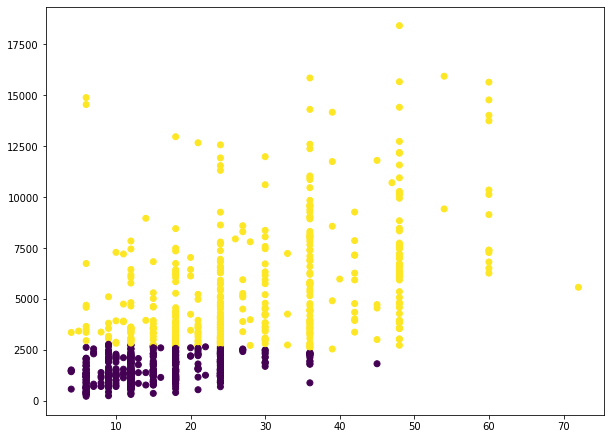

col_0,0,1
Actual_Score,,
1,419,281
2,156,144


In [67]:
data_num_sc = ScaleMinMax(data_num)

KMENAS(pd.DataFrame(data_num_sc))

### KMEANS + StandardScaler 

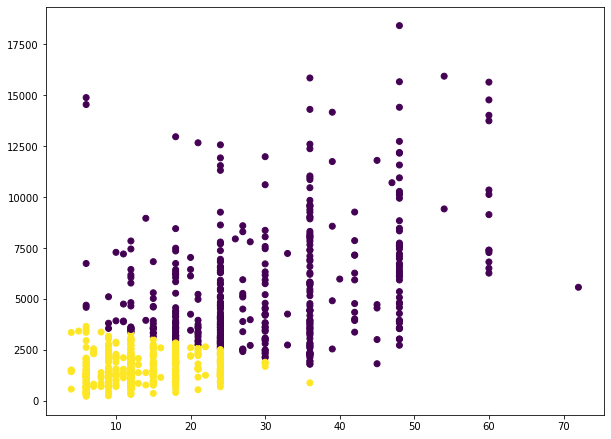

col_0,0,1
Actual_Score,,
1,274,426
2,152,148


In [13]:
data_num_sc = ScalerStandard(data_num)

KMENAS(pd.DataFrame(data_num_sc))

# Age + Credit Amount 

### KMEANS + MinMaxScaler 

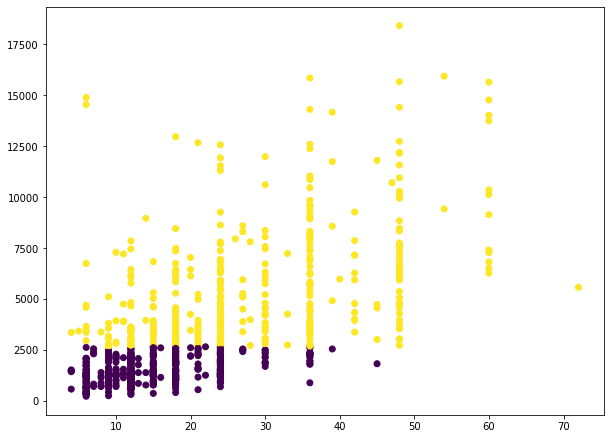

col_0,0,1
Actual_Score,,
1,416,284
2,156,144


In [14]:
data_num_sc = ScaleMinMax(data_num.drop("Duration", axis=1))

KMENAS(pd.DataFrame(data_num_sc))

### KMEANS + Standard Scaler 

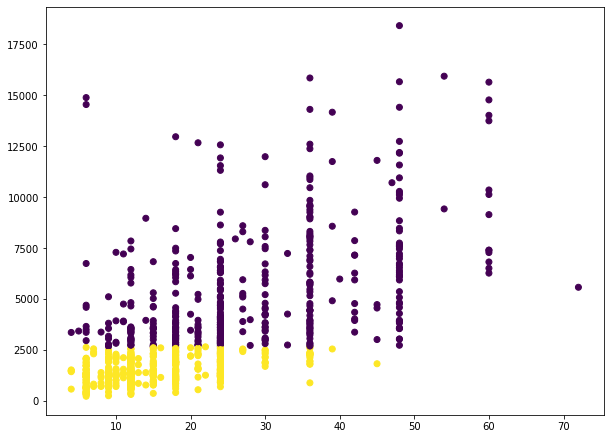

col_0,0,1
Actual_Score,,
1,285,415
2,144,156


In [15]:
data_num_sc = ScalerStandard(data_num.drop("Duration", axis=1))

KMENAS(pd.DataFrame(data_num_sc))

# Age + Duration 

### KMEANS + MinMaxScaler

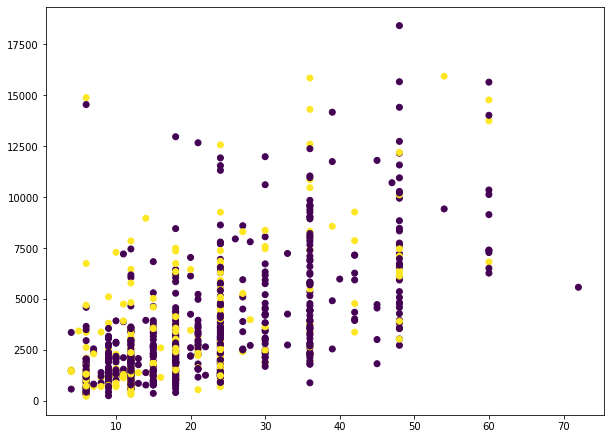

col_0,0,1
Actual_Score,,
1,484,216
2,227,73


In [16]:
data_num_sc = ScaleMinMax(data_num.drop("Credit_Amount", axis=1))

KMENAS(pd.DataFrame(data_num_sc))

### KMEANS + StandardScaler

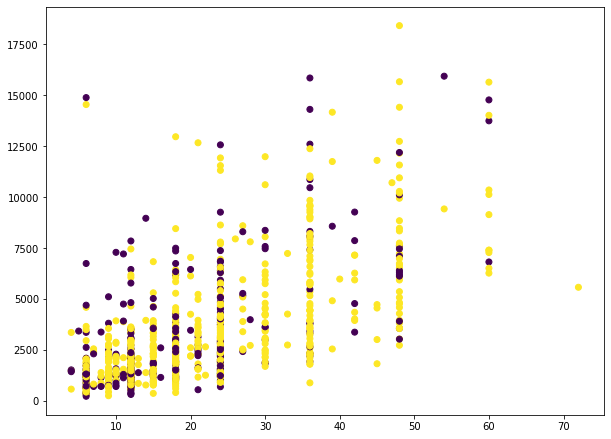

col_0,0,1
Actual_Score,,
1,219,481
2,73,227


In [17]:
data_num_sc = ScalerStandard(data_num.drop("Credit_Amount", axis=1))

KMENAS(pd.DataFrame(data_num_sc))

## without PCA

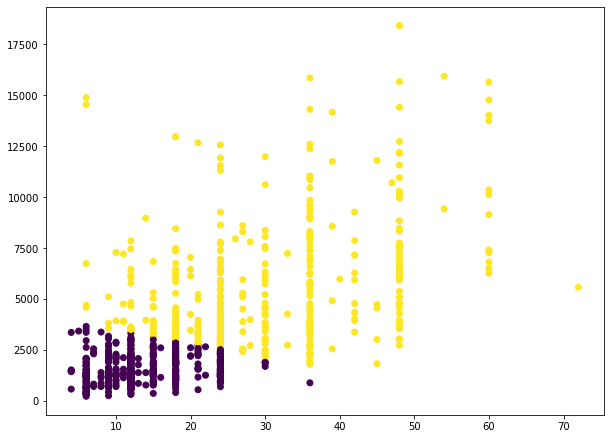

col_0,0,1
Actual_Score,,
1,426,274
2,148,152


In [18]:
data_num_red = ScalerStandard(data_num)
reduced_data = PCA(n_components=2).fit_transform(data_num_red)

KMENAS(pd.DataFrame(data_num_red))

### Age + Duration + Credit Amount 

### KMEANS + PCA + MinMaxScaler

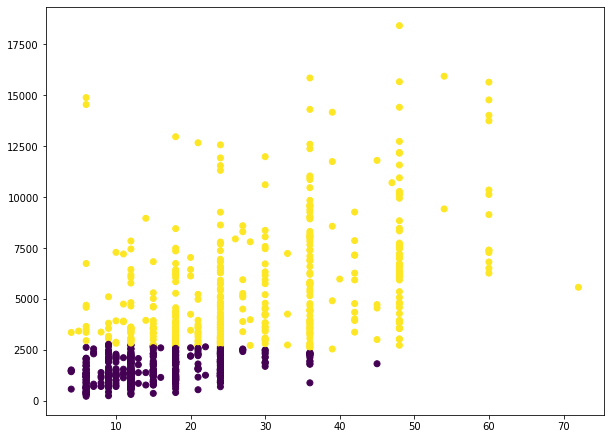

col_0,0,1
Actual_Score,,
1,419,281
2,156,144


In [19]:
data_num_sc = ScaleMinMax(data_num)
reduced_data_PCA = PCA(n_components=2).fit_transform(data_num_sc)

KMENAS(pd.DataFrame(reduced_data_PCA))

### KMEANS + PCA + StandardScaler

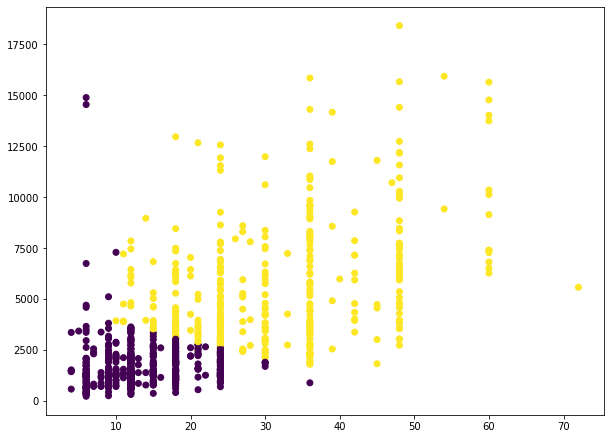

col_0,0,1
Actual_Score,,
1,447,253
2,154,146


In [20]:
data_num_sc = ScalerStandard(data_num)
reduced_data_PCA = PCA(n_components=2).fit_transform(data_num_sc)

KMENAS(pd.DataFrame(reduced_data_PCA))

### KMEANS + KernellPCA(poly) + MinMaxScaler

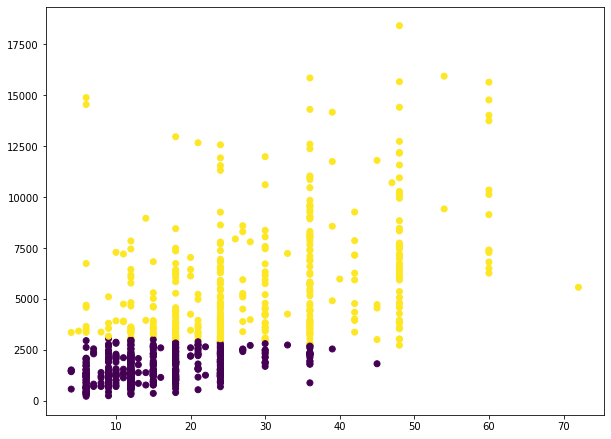

col_0,0,1
Actual_Score,,
1,448,252
2,164,136


In [21]:
data_num_sc = ScaleMinMax(data_num)

kpca = KernelPCA(n_components=2,kernel="poly")
reduced_data_kpca = kpca.fit_transform(data_num_sc)
KMENAS(pd.DataFrame(reduced_data_kpca))

### KMEANS + KernellPCA(poly) + StandardScaler

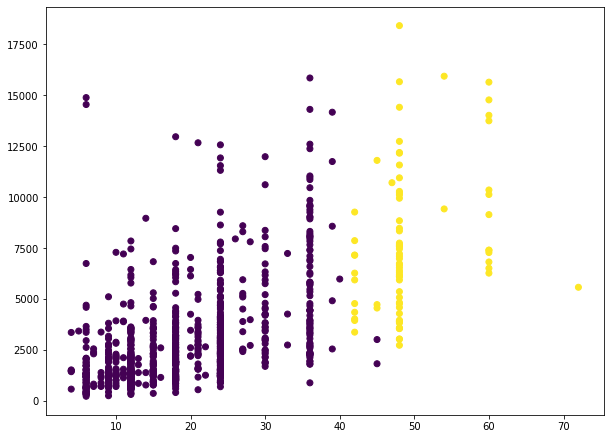

col_0,0,1
Actual_Score,,
1,662,38
2,259,41


In [22]:
data_num_sc = ScalerStandard(data_num)

kpca = KernelPCA(n_components=2,kernel="poly")
reduced_data_kpca = kpca.fit_transform(data_num_sc)
KMENAS(pd.DataFrame(reduced_data_kpca))

### KMEANS + KernellPCA(rbf) + MinMaxScaler

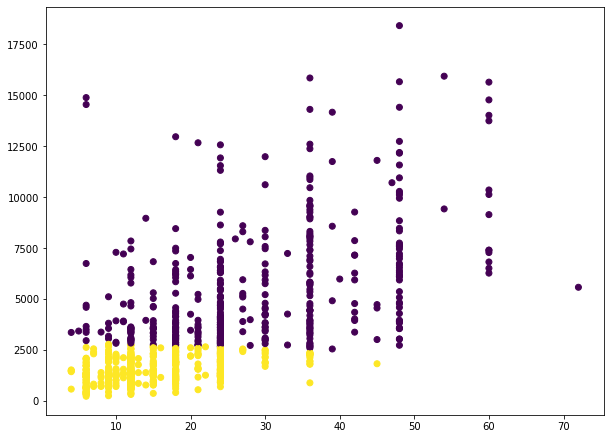

col_0,0,1
Actual_Score,,
1,281,419
2,144,156


In [23]:
data_num_sc = ScaleMinMax(data_num)

kpca = KernelPCA(n_components=2,kernel="rbf")
reduced_data_kpca = kpca.fit_transform(data_num_sc)
KMENAS(pd.DataFrame(reduced_data_kpca))

### KMEANS + KernellPCA(rbf) + StandardScaler

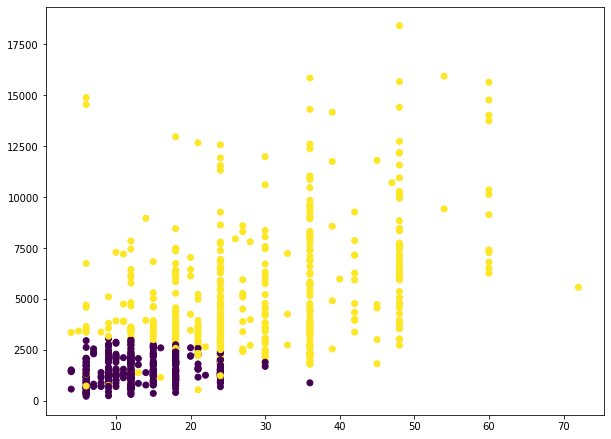

col_0,0,1
Actual_Score,,
1,373,327
2,135,165


In [24]:
data_num_sc = ScalerStandard(data_num)

kpca = KernelPCA(n_components=2,kernel="rbf")
reduced_data_kpca = kpca.fit_transform(data_num_sc)
KMENAS(pd.DataFrame(reduced_data_kpca))

### KMEANS + SVD + MinMaxScaler

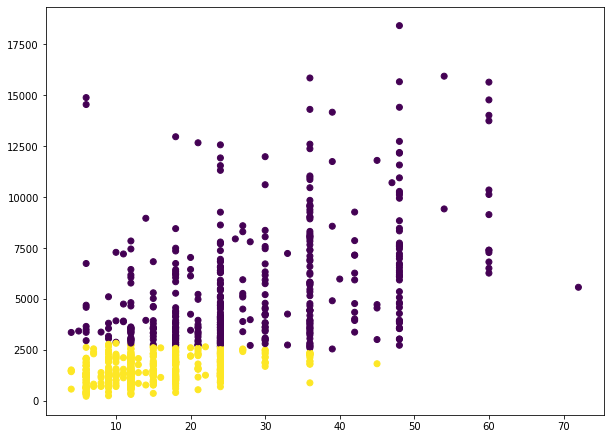

col_0,0,1
Actual_Score,,
1,280,420
2,144,156


In [25]:
data_num_sc = ScaleMinMax(data_num)

svd = TruncatedSVD(n_components=2)
reduced_data_svd = svd.fit_transform(data_num_sc)
KMENAS(pd.DataFrame(reduced_data_svd))

### KMEANS + SVD + StandardScaler

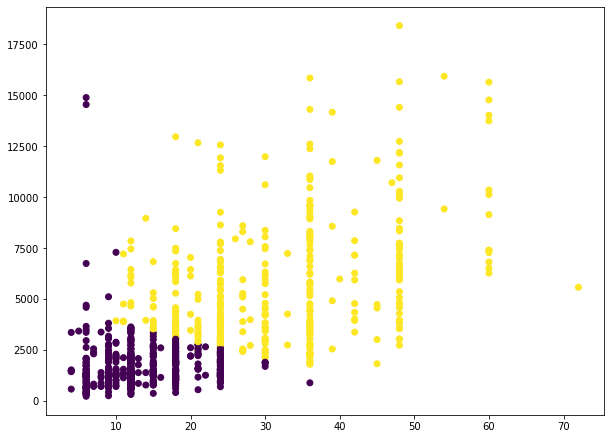

col_0,0,1
Actual_Score,,
1,447,253
2,154,146


In [26]:
data_num_sc = ScalerStandard(data_num)

svd = TruncatedSVD(n_components=2)
reduced_data_svd = svd.fit_transform(data_num_sc)
KMENAS(pd.DataFrame(reduced_data_svd))

# CAH 

In [27]:
#librairies pour la CAH 
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

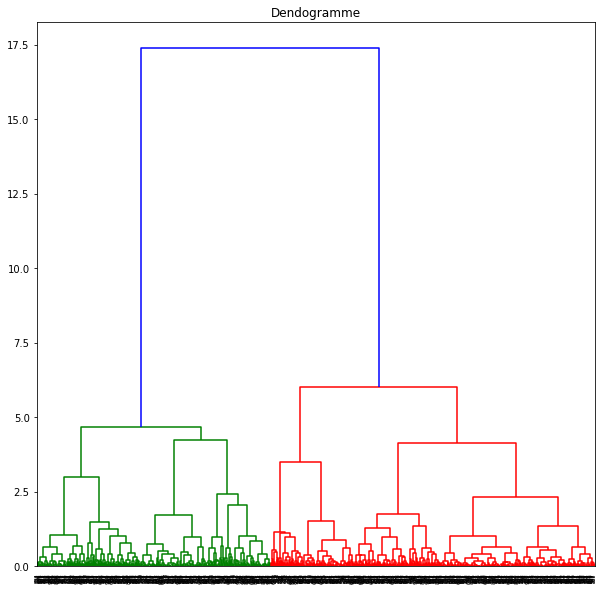

In [29]:
data_num_sc = ScaleMinMax(data_num)

matrice = CAH(data_num_sc)

In [30]:
groups = fcluster(matrice, t=15,criterion='distance')
pd.crosstab(target,groups)

col_0,1,2
Actual_Score,,
1,279,421
2,141,159


### CAH + StandardScaler 

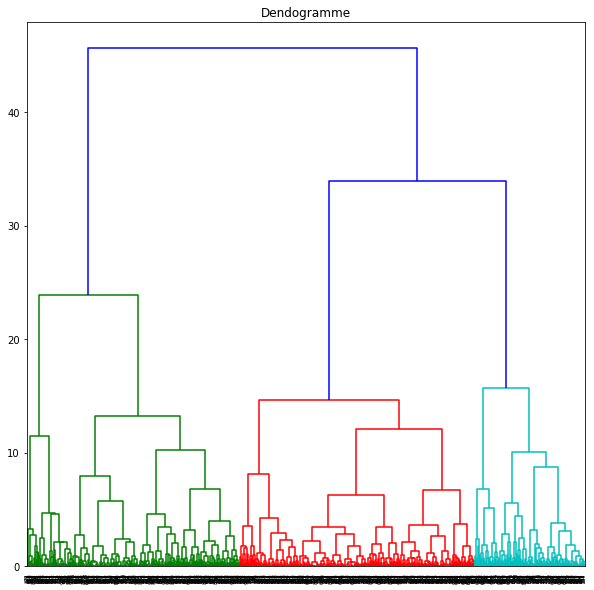

In [31]:
data_num_sc = ScalerStandard(data_num)

matrice = CAH(data_num_sc)

In [32]:
groups = fcluster(matrice, t=40,criterion='distance')
pd.crosstab(target,groups)

col_0,1,2
Actual_Score,,
1,250,450
2,131,169


### CAH + MinMaxScaler + PCA

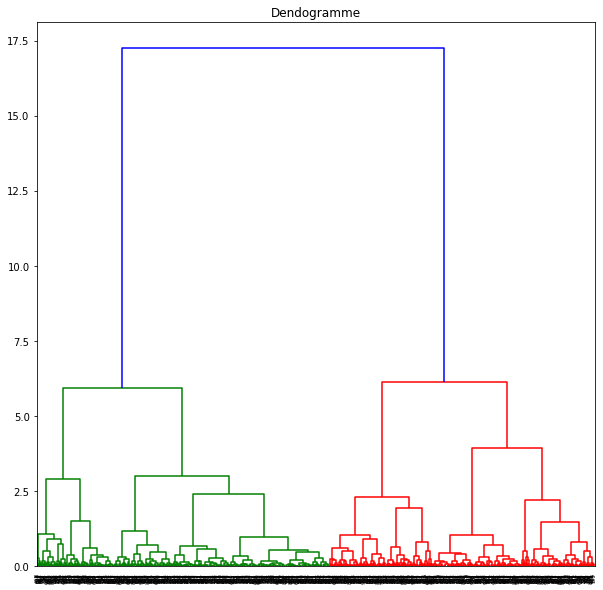

In [62]:
data_num_sc = ScaleMinMax(data_num)
reduced_data_PCA = PCA(n_components=2).fit_transform(data_num_sc)

matricePCA = CAH(reduced_data_PCA)

In [63]:
groups = fcluster(matricePCA, t=10,criterion='distance')
pd.crosstab(target,groups)

col_0,1,2
Actual_Score,,
1,384,316
2,141,159


### CAH + StandardScaler + PCA

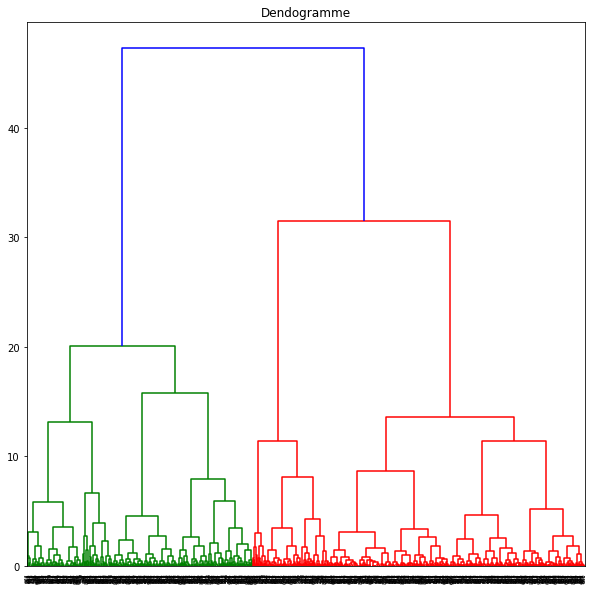

In [64]:
data_num_sc = ScalerStandard(data_num)
reduced_data_PCA = PCA(n_components=2).fit_transform(data_num_sc)

matricePCA = CAH(reduced_data_PCA)

In [65]:
groups = fcluster(matricePCA, t=40,criterion='distance')
pd.crosstab(target,groups)

col_0,1,2
Actual_Score,,
1,256,444
2,149,151


### CAH + MinMaxScaler + KernellPCA(poly)

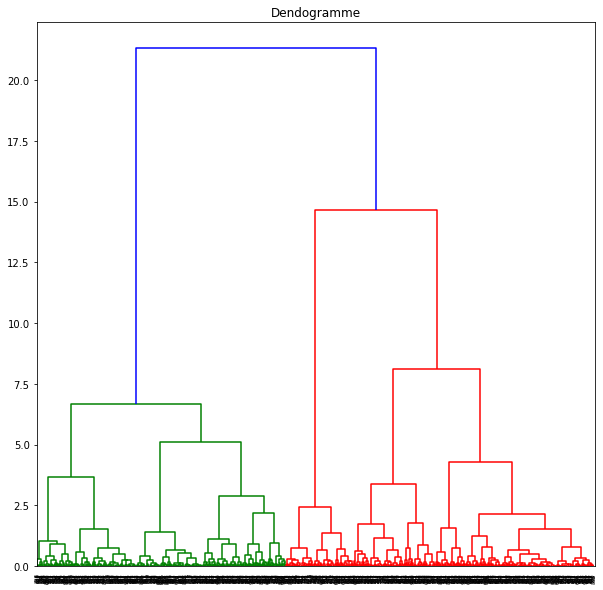

In [33]:
data_num_sc = ScaleMinMax(data_num)

kpca = KernelPCA(n_components=2,kernel="poly")
reduced_data_kpca = kpca.fit_transform(reduced_data_kpca)

matriceKPCA = CAH(reduced_data_kpca)

In [34]:
groups = fcluster(matriceKPCA, t=20,criterion='distance')
pd.crosstab(target,groups)

col_0,1,2
Actual_Score,,
1,289,411
2,158,142


### CAH + StandardScaler + KernellPCA(poly)

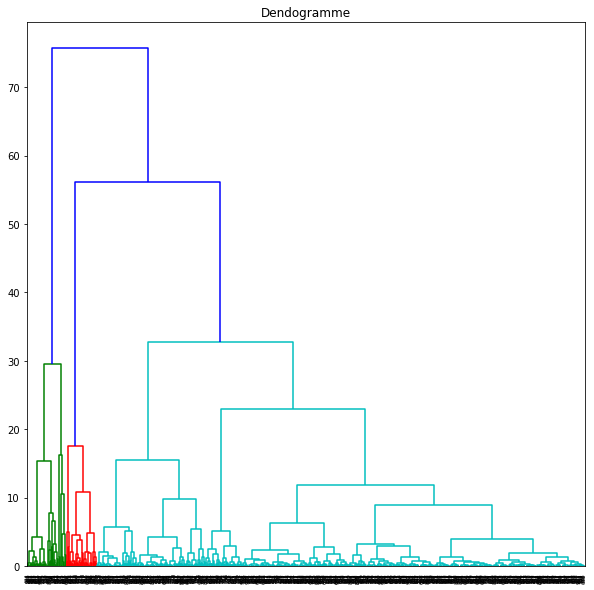

In [35]:
data_num_sc = ScalerStandard(data_num)

kpca = KernelPCA(n_components=2,kernel="poly")
reduced_data_kpca = kpca.fit_transform(data_num_sc)

matriceKPCA = CAH(reduced_data_kpca)

In [36]:
groups = fcluster(matriceKPCA, t=70,criterion='distance')
pd.crosstab(target,groups)

col_0,1,2
Actual_Score,,
1,33,667
2,38,262


### CAH + MinMaxScaler + KernellPCA(rbf)

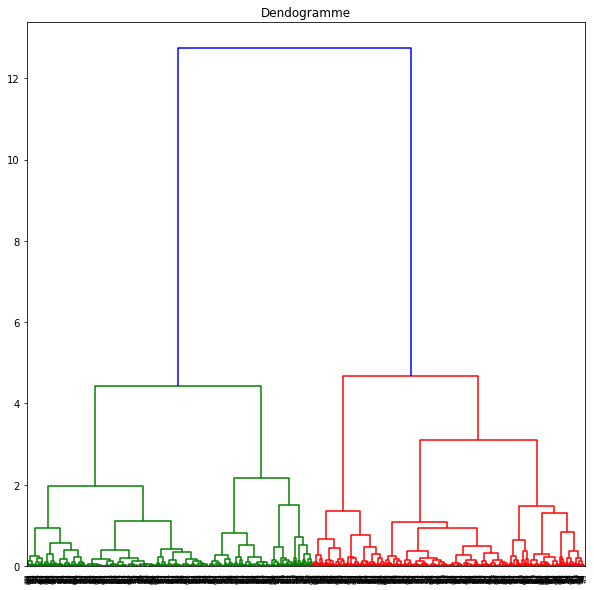

In [37]:
data_num_sc = ScaleMinMax(data_num)

kpca = KernelPCA(n_components=2,kernel="rbf")
reduced_data_kpca = kpca.fit_transform(data_num_sc)

matriceKPCA = CAH(reduced_data_kpca)

In [38]:
groups = fcluster(matriceKPCA, t=10,criterion='distance')
pd.crosstab(target,groups)

col_0,1,2
Actual_Score,,
1,374,326
2,138,162


### CAH + StandardScaler + KernellPCA(rbf)

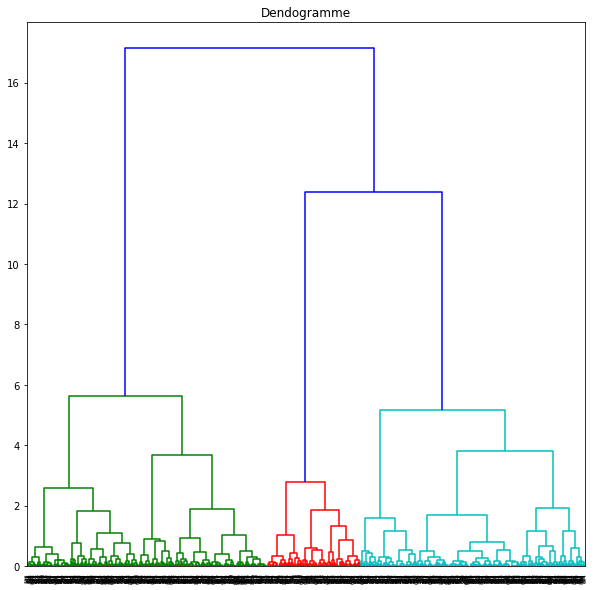

In [39]:
data_num_sc = ScalerStandard(data_num)

kpca = KernelPCA(n_components=2,kernel="rbf")
reduced_data_kpca = kpca.fit_transform(data_num_sc)

matriceKPCA = CAH(reduced_data_kpca)

In [40]:
groups = fcluster(matriceKPCA, t=16,criterion='distance')
pd.crosstab(target,groups)

col_0,1,2
Actual_Score,,
1,279,421
2,152,148


### CAH + MinMaxScaler + SVD

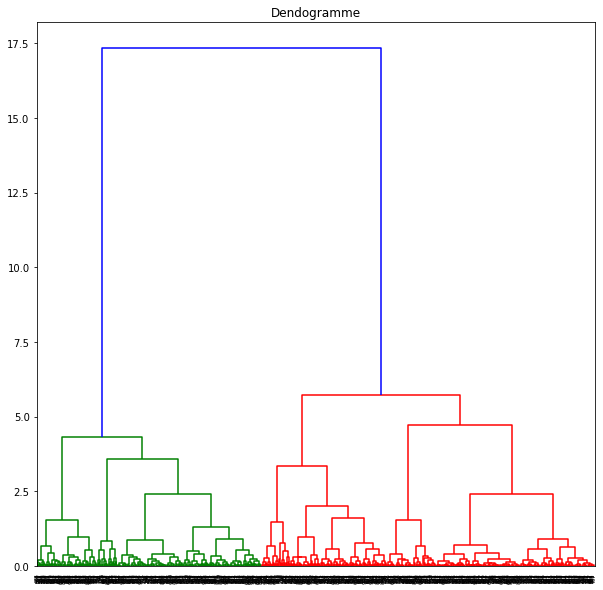

In [41]:
data_num_sc = ScaleMinMax(data_num)

svd = TruncatedSVD(n_components=2)
reduced_data_svd = svd.fit_transform(data_num_sc)
matriceSVD = CAH(reduced_data_svd)

In [42]:
groups = fcluster(matriceSVD, t=10,criterion='distance')
pd.crosstab(target,groups)

col_0,1,2
Actual_Score,,
1,264,436
2,139,161


### CAH + StandardScaler + SVD

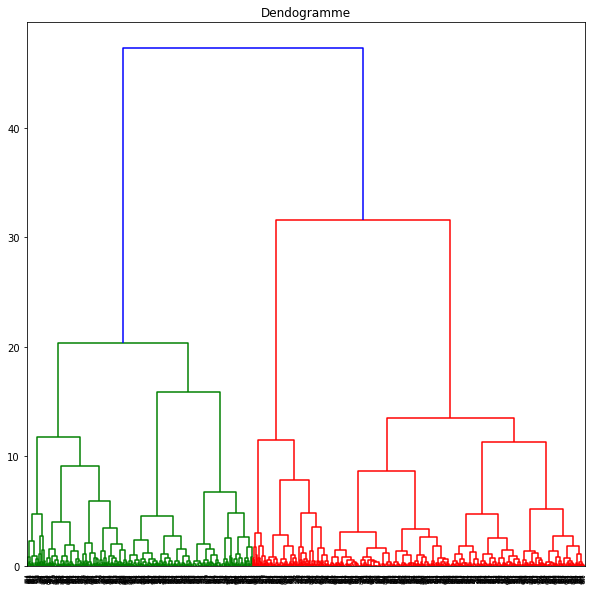

In [43]:
data_num_sc = ScalerStandard(data_num)

svd = TruncatedSVD(n_components=2)
reduced_data_svd = svd.fit_transform(data_num_sc)
matriceSVD = CAH(reduced_data_svd)

In [44]:
groups = fcluster(matriceSVD, t=40,criterion='distance')
pd.crosstab(target,groups)

col_0,1,2
Actual_Score,,
1,256,444
2,149,151


# Age + Duration

### CAH + MinMaxScaler 

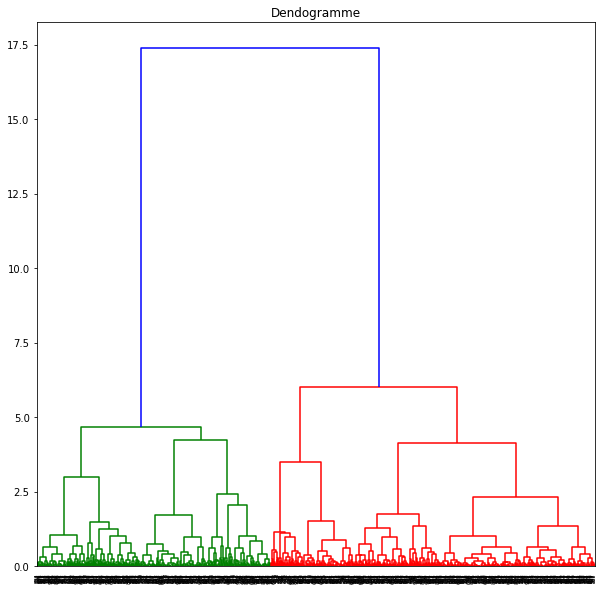

In [45]:
data_num_sc = ScaleMinMax(data_num)

matrice = CAH(data_num_sc)

In [46]:
groups = fcluster(matrice, t=10,criterion='distance')
pd.crosstab(target,groups)

col_0,1,2
Actual_Score,,
1,279,421
2,141,159


### CAH + StandardScaler 

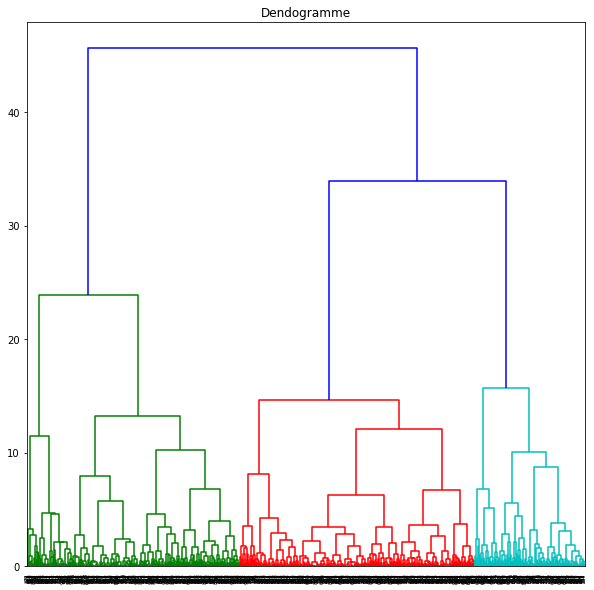

In [47]:
data_num_sc = ScalerStandard(data_num)

matrice = CAH(data_num_sc)

In [48]:
groups = fcluster(matrice, t=40,criterion='distance')
pd.crosstab(target,groups)

col_0,1,2
Actual_Score,,
1,250,450
2,131,169


# Age + Credit Amount

### CAH + MinMaxScaler 

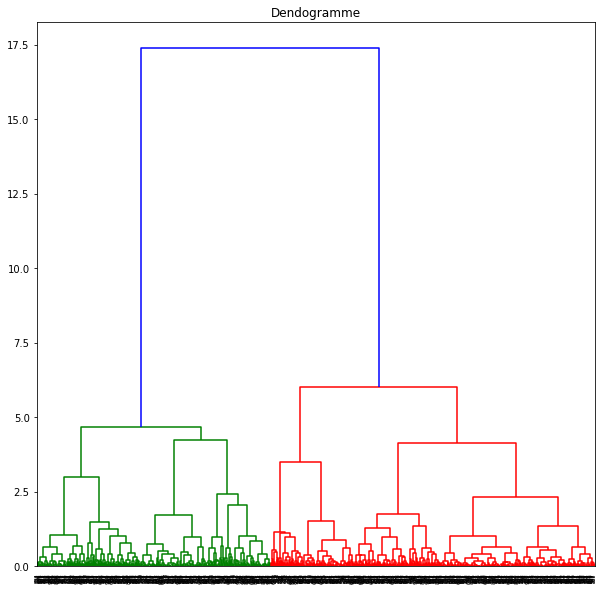

In [49]:
data_num_sc = ScaleMinMax(data_num)

matrice = CAH(data_num_sc)

In [50]:
groups = fcluster(matrice, t=10,criterion='distance')
pd.crosstab(target,groups)

col_0,1,2
Actual_Score,,
1,279,421
2,141,159


### CAH + StandardScaler

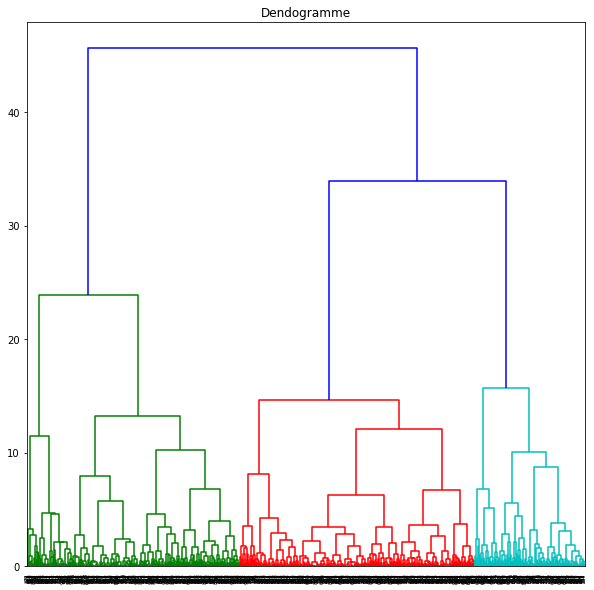

In [51]:
data_num_sc = ScalerStandard(data_num)

matrice = CAH(data_num_sc)

In [61]:
groups = fcluster(matrice, t=40,criterion='distance')
pd.crosstab(target,groups)

col_0,1,2
Actual_Score,,
1,250,450
2,131,169
